In [147]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [148]:
symbols_dir = "../symbols_dataset/symbols"

In [149]:
symbols_img = cv2.imread(f"{symbols_dir}/1.png", cv2.IMREAD_GRAYSCALE)

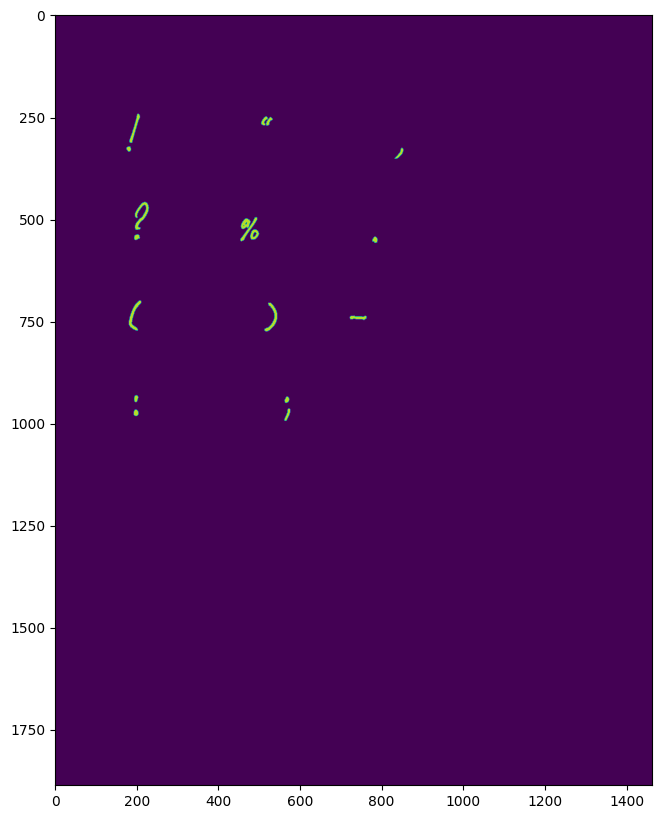

In [110]:
plt.figure(figsize=(10, 10))
plt.imshow(symbols_img)

In [150]:
def get_empty_line_y(pr: np.ndarray, threshold: int):
    """
    |-------------------
    |first written line
    |
    |-------------------    empty line (we need to find its coordinate for each pair of adjacent lines)
    |
    |second written line
    |-------------------

    :param threshold: the number of pixels which can be empty in one line
    :param pr: image projection on the y axis
    :return: list of y - middle line coordinate between two lines
    """
    y_list = []
    y_start = 0

    for i, s in enumerate(pr):
        if s != 0:
            continue
        if s == 0 and i > 0 and pr[i - 1] != 0:
            y_start = i
            continue
        if s == 0 and i < len(pr) - 1 and pr[i + 1] != 0 and i - y_start > threshold:
            y_list.append((i + y_start) // 2)

    return y_list


In [112]:
projection = symbols_img.sum(axis=1)
borders = get_empty_line_y(projection, 25)

In [113]:
line_height = borders[2] - borders[1]
borders[0] = borders[1] - line_height
borders.append(borders[-1] + line_height)
borders

[180, 404, 628, 852, 1076]

In [114]:
h_projection = symbols_img.sum(axis=0)
h_borders = get_empty_line_y(h_projection, 45)
h_borders

[87, 341, 648]

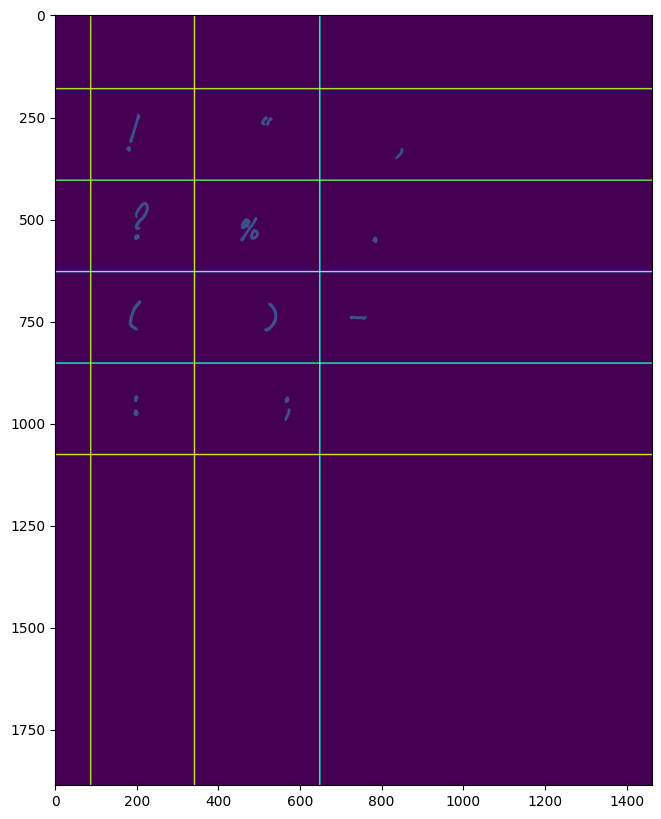

In [115]:
for y in borders:
    symbols_img = cv2.line(symbols_img, (0, y), (symbols_img.shape[1], y), (255,255,255), 2)

for x in h_borders:
    symbols_img = cv2.line(symbols_img, (x, 0), (x, symbols_img.shape[0]), (255,255,255), 2)

plt.figure(figsize=(10, 10))
plt.imshow(symbols_img)

In [125]:
images = []
for i in range(1, 5):
    symbols_img = cv2.imread(f"{symbols_dir}/{i}.png", cv2.IMREAD_GRAYSCALE)
    v_projection = symbols_img.sum(axis=1)
    v_borders = get_empty_line_y(v_projection, 25)
    line_height = v_borders[2] - v_borders[1]
    v_borders[0] = v_borders[1] - line_height
    v_borders.append(v_borders[-1] + line_height)

    h_projection = symbols_img.sum(axis=0)
    h_borders = get_empty_line_y(h_projection, 65)
    line_width = h_borders[2] - h_borders[1]
    h_borders.append(h_borders[-1] + line_width)

    for y in v_borders:
        symbols_img = cv2.line(symbols_img, (0, y), (symbols_img.shape[1], y), (255,255,255), 2)

    for x in h_borders:
        symbols_img = cv2.line(symbols_img, (x, 0), (x, symbols_img.shape[0]), (255,255,255), 2)

    images.append(symbols_img)

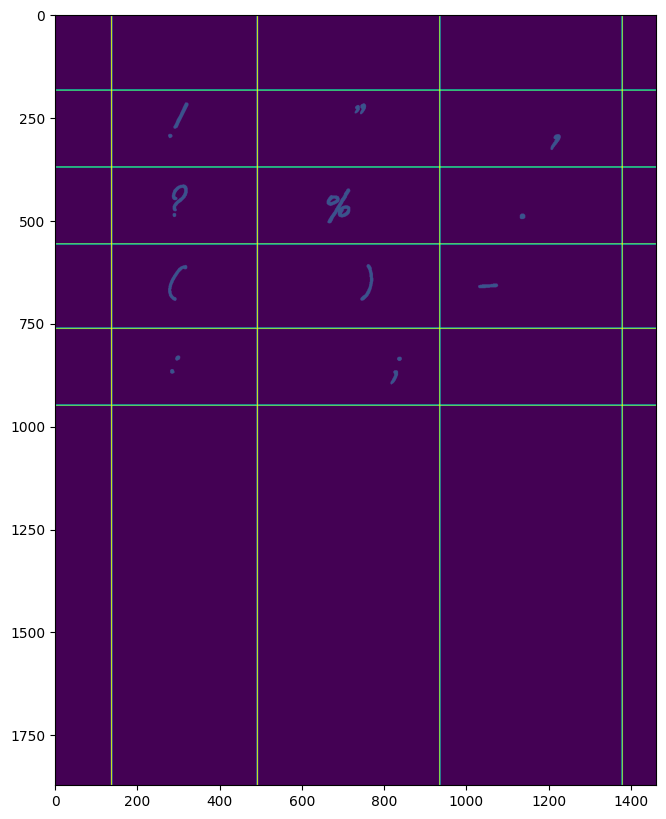

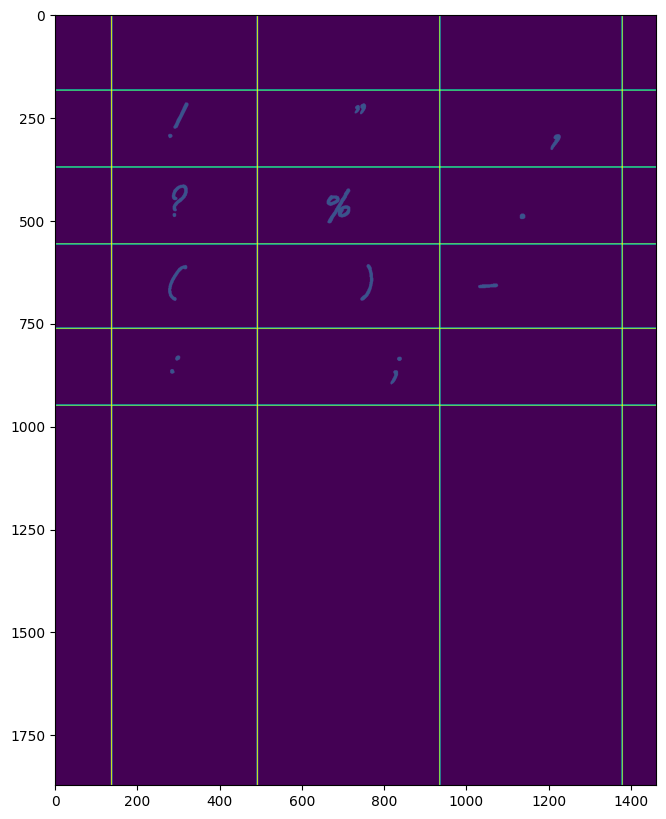

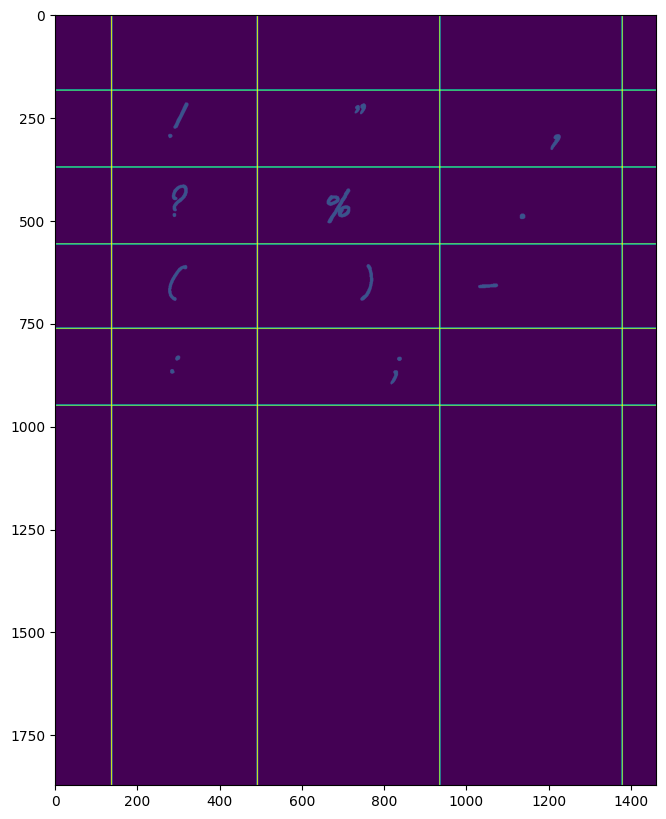

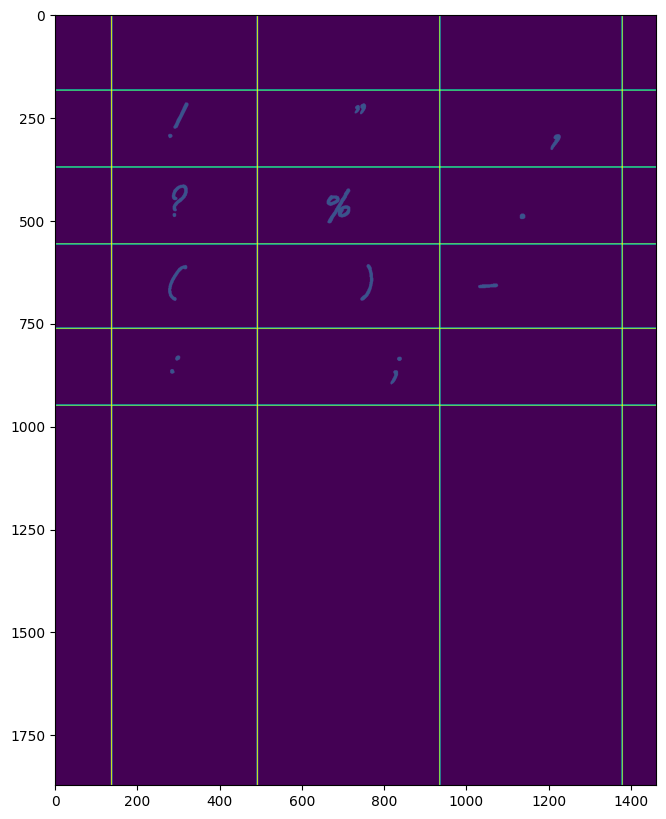

In [126]:
for img in images:
    plt.figure(figsize=(10, 10))
    plt.imshow(symbols_img)

In [152]:
out_dir = "../images"
for i in range(1, 5):
    symbols_img = cv2.imread(f"{symbols_dir}/{i}.png", cv2.IMREAD_GRAYSCALE)
    v_projection = symbols_img.sum(axis=1)
    v_borders = get_empty_line_y(v_projection, 25)
    line_height = v_borders[2] - v_borders[1]
    v_borders[0] = v_borders[1] - line_height
    v_borders.append(v_borders[-1] + line_height)

    h_projection = symbols_img.sum(axis=0)
    h_borders = get_empty_line_y(h_projection, 65)
    line_width = h_borders[2] - h_borders[1]
    h_borders.append(h_borders[-1] + line_width)

    k = 0
    for y in range(len(v_borders) - 1):
        for x in range(len(h_borders) - 1):
            img = symbols_img[v_borders[y]:v_borders[y + 1], h_borders[x]:h_borders[x + 1]]
            if np.all(img == 0):
                continue

            coords = np.argwhere(img > 0)
            _, x_min = coords.min(axis=0)
            _, x_max = coords.max(axis=0)
            img = img[:, x_min:x_max + 1]
            square = np.zeros((img.shape[0], img.shape[0]))
            x_coord = int(square.shape[1] / 2 - img.shape[1] / 2)
            square[:, x_coord:x_coord + img.shape[1]] = img
            img = square
            img = cv2.resize(img, (205, 205), cv2.INTER_CUBIC)
            img = img[30:175,30:175]
            img = np.where(img == 0, 255, img)
            img = np.where(img != 255, 0, img)
            img = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_GRAY2BGR)
            cv2.imwrite(os.path.join(out_dir, f"{i}_{k}.png"), img)
            k += 1